In [3]:
from ultralytics import YOLO

In [4]:
DATA_YAML_PATH = 'Dataset_v3/data.yaml'

In [5]:
MODEL_TYPE = 'yolov8n.pt'

In [4]:
EPOCHS = 100

In [6]:
IMAGE_SIZE = 640

In [7]:
BATCH_SIZE = 16

In [7]:
def main():
    # Initialize the model
    model = YOLO(MODEL_TYPE)
    
    # Train the model
    results = model.train(
        data=DATA_YAML_PATH,
        epochs=EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        workers=4  # Number of CPU workers for dataloading
    )

    # Validate the model (optional, runs after training by default)
    val_results = model.val(data=DATA_YAML_PATH)

    # Test the model (optional, requires test set defined in data.yaml)
    test_results = model.val(data=DATA_YAML_PATH, split="test")

    print("\nTraining Complete.")
    print("Validation Results:", val_results)
    print("Test Results:", test_results)

    # Export model (optional, e.g., to ONNX)
    export_results = model.export(format='onnx')
    print("Exported model to ONNX format:", export_results)

if __name__ == '__main__':
    main()

New https://pypi.org/project/ultralytics/8.3.182 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.159 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Dataset_v3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, opt

train: Scanning /mnt/c/Users/krali/OneDrive/Desktop/Loranet/Dataset_v3/train/labels.cache... 4718 images, 0 backgrounds,

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 4878. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.6±1.1 ms, read: 4.0±1.6 MB/s, size: 76.4 KB)


val: Scanning /mnt/c/Users/krali/OneDrive/Desktop/Loranet/Dataset_v3/valid/labels.cache... 656 images, 0 backgrounds, 0 


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=7.4e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.98G      1.317      5.141      1.765         44        640:   1%|▏         | 4/295 [00:10<12:51,  2.6


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

model = YOLO("runs/detect/train4/weights/best.pt")

In [8]:
# Validate on the test set
results = model.val(data=DATA_YAML_PATH, split="test")

Ultralytics 8.3.159 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Model summary (fused): 72 layers, 3,350,117 parameters, 0 gradients, 9.7 GFLOPs
val: Fast image access ✅ (ping: 8.8±0.5 ms, read: 2.2±0.3 MB/s, size: 74.9 KB)


val: Scanning /mnt/c/Users/krali/OneDrive/Desktop/Loranet/Dataset_v3/test/labels.cache... 394 images, 0 backgrounds, 0 c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<


                   all        394        411      0.423      0.469      0.497      0.319
         African Tulip          6          7      0.588      0.571      0.566      0.344
          Akasia Lebar          5          5      0.157        0.4      0.283      0.168
               Angsana          4          4          0          0       0.11     0.0329
          Asam Gelugor          3          3          0          0     0.0112     0.0101
             Asam Jawa          5          5      0.757        0.6      0.791       0.49
                Ashoka          5          5      0.541      0.249       0.45      0.255
  Balau Sengkawang Air          2          2      0.106      0.212      0.148     0.0633
                Bebaru          7          7      0.663      0.845      0.869      0.515
       Belimbing Buluh          1          1      0.241          1      0.995      0.895
              Belinjau          3          3      0.472      0.667      0.505      0.337
        Bintangor Lau

In [9]:
print("mAP@0.5:0.95:", results.box.map)    
print("mAP@0.5:", results.box.map50) 

mAP@0.5:0.95: 0.31906163517812447
mAP@0.5: 0.49690228341061476


In [108]:
results = model.predict(source='efficientdet/valid/senna_30_jpeg.rf.5299106036b11fc98bb5d2a3216371f1.jpg', save=False, conf=0.01)


image 1/1 /mnt/c/Users/krali/OneDrive/Desktop/Loranet/efficientdet/valid/senna_30_jpeg.rf.5299106036b11fc98bb5d2a3216371f1.jpg: 640x640 1 Angsana, 1 Yellow Flame, 103.6ms
Speed: 9.3ms preprocess, 103.6ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)


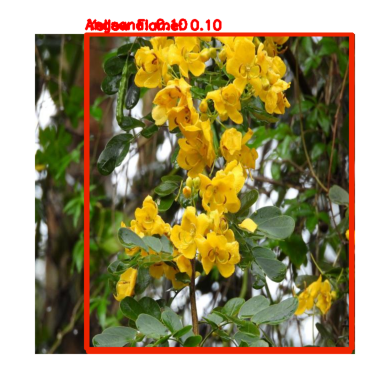

In [109]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import yaml

DATA_YAML_PATH = 'Dataset_v3/data.yaml'

# Load your data.yaml file
with open(DATA_YAML_PATH, "r") as f:
    data_yaml = yaml.safe_load(f)

class_names = data_yaml["names"]  # This is a list of class names

img = cv2.imread('efficientdet/valid/senna_30_jpeg.rf.5299106036b11fc98bb5d2a3216371f1.jpg')
top, bottom, left, right = 50, 50, 50, 50  # Adjust these for more/less space

# Create white border
img_padded = cv2.copyMakeBorder(
    img,
    top, bottom, left, right,
    cv2.BORDER_CONSTANT,
    value=[255, 255, 255]  # White color
)

# Now draw bounding boxes/labels using coordinates shifted by the border
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf.item()
        label = int(box.cls.item())
        class_name = class_names[label]

        # Shift coordinates by the amount of padding (left and top)
        x1_shifted, y1_shifted = int(x1.item()) + left, int(y1.item()) + top
        x2_shifted, y2_shifted = int(x2.item()) + left, int(y2.item()) + top

        # Draw bounding box and label on padded image
        cv2.rectangle(img_padded, (x1_shifted, y1_shifted), (x2_shifted, y2_shifted), (0, 36, 238), 5)
        cv2.putText(
            img_padded,
            f'{class_name}: {conf:.2f}',
            (x1_shifted, y1_shifted - 10),  # Room above box
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9, (0,0,255), 3
        )

# Display the result
img_rgb = cv2.cvtColor(img_padded, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()